<a href="https://colab.research.google.com/github/Sirmuchai/Machine-Learning/blob/main/Week4_Project_1__Introduction_to_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Machine Learning

**Background Information**
HR analytics is revolutionising the way human resources departments operate, leading to higher efficiency and better results overall. Human resources have been using analytics for years. However, the collection, processing, and analysis of data have been largely manual, and given the nature of human resources dynamics and HR KPIs, the approach has been constraining HR. Therefore, it is surprising that HR departments woke up to the utility of machine learning so late in the game.

***Currently the process, they are following is:***

* They first identify a set of employees based on recommendations/ past performance.
* Selected employees go through the separate training and evaluation program for
each vertical.
* These programs are based on the required skill of each vertical. At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., the employee gets a promotion.


**Objective**

* Build model to predict eligibility for an employee to be promoted or not

**Dataset**
* Dataset URL: https://bit.ly/2ODZvLCHRDataset
* Glossary URL: https://bit.ly/2Wz3sWcGlossary
* Project Source: https://bit.ly/2CFzoRX

### Module to be used

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loading Dataset and describe data

In [ ]:
hr_df = pd.read_csv("https://bit.ly/2ODZvLCHRDataset")

hr_df.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
# Dataset shape

hr_df.shape

(54808, 14)

In [ ]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


**Conclusions:**
* `education` and `previous_year_rating` have missing values
* `is_promoted` column is our target
* *5 columns* are categorical data and the other *9 columns* are numerical data.

In [ ]:
hr_df.is_promoted.unique()

array([0, 1])

### Data Cleaning

In [ ]:
# Confirming sum of missing value is our dataset
hr_df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [ ]:
# Dropping data with null values

clean_df = hr_df.dropna().reset_index(drop = True)

clean_df.shape

(48660, 14)

In [ ]:
# Rename columns
clean_df.rename(columns ={'awards_won?':'awards_won', 'KPIs_met >80%':'kpis_met'}, inplace = True)

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48660 entries, 0 to 48659
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           48660 non-null  int64  
 1   department            48660 non-null  object 
 2   region                48660 non-null  object 
 3   education             48660 non-null  object 
 4   gender                48660 non-null  object 
 5   recruitment_channel   48660 non-null  object 
 6   no_of_trainings       48660 non-null  int64  
 7   age                   48660 non-null  int64  
 8   previous_year_rating  48660 non-null  float64
 9   length_of_service     48660 non-null  int64  
 10  kpis_met              48660 non-null  int64  
 11  awards_won            48660 non-null  int64  
 12  avg_training_score    48660 non-null  int64  
 13  is_promoted           48660 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.2+ MB


### Data Visualization

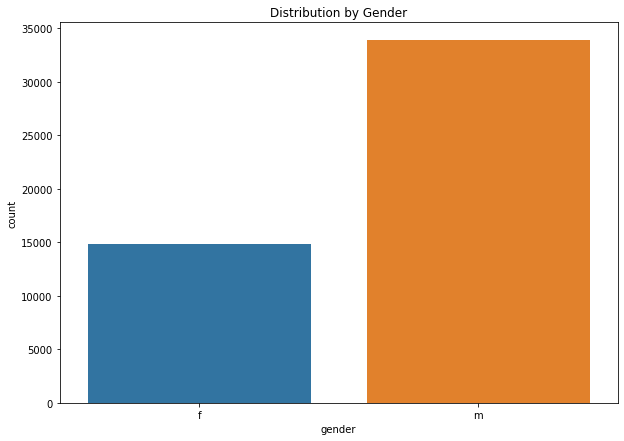

In [ ]:
# Gender distribution our cleaned data
plt.figure(figsize=(10,7))
sns.countplot(x = clean_df['gender'])
plt.title("Distribution by Gender")
plt.show()
              

* We have more male than female

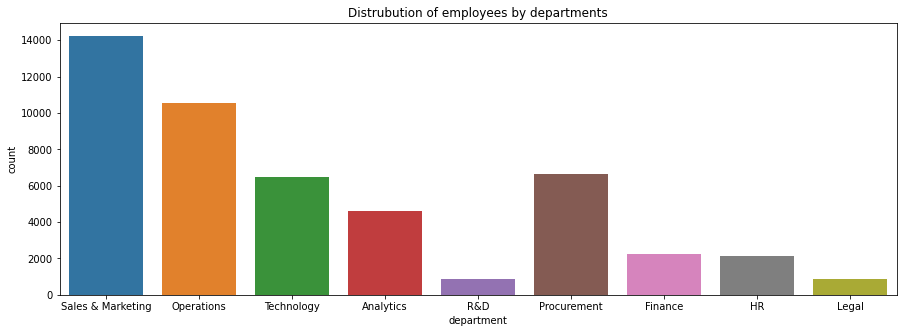

In [ ]:
# Distrubution of employees by departments
plt.figure(figsize=(15,5))
sns.countplot(x=clean_df['department'])
plt.title("Distrubution of employees by departments")
plt.show()

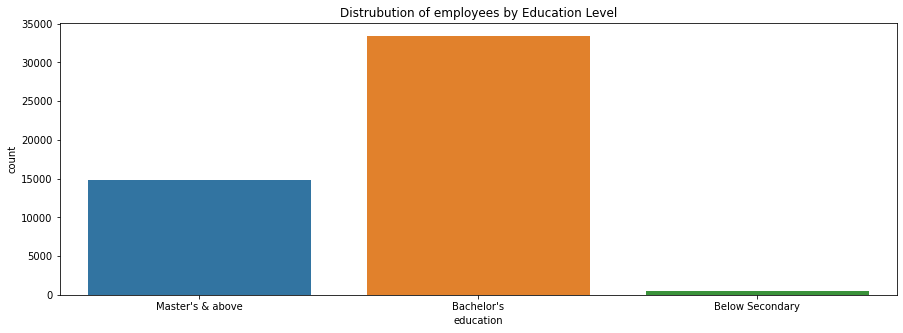

In [ ]:
# Distrubution of employees by Education
plt.figure(figsize=(15,5))
sns.countplot(x=clean_df['education'])
plt.title("Distrubution of employees by Education Level")
plt.show()

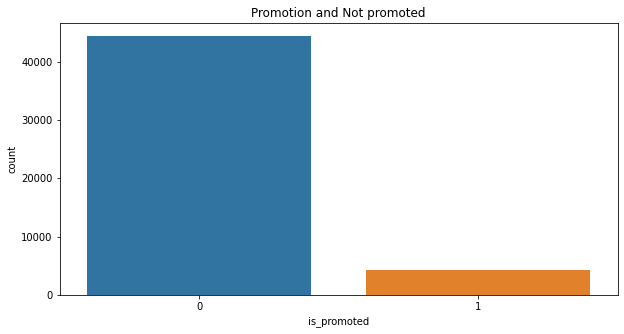

In [ ]:
# How many employees are promoted
plt.figure(figsize=(10,5))
sns.countplot(x=clean_df.is_promoted)
plt.title("Promotion and Not promoted")
plt.show()

## Data processing:
1. Encode these categorical data to numerical data: `gender`, `education` & `department`
2. Join the converted columns to the numerical data

### One-hot  encoding 

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = ['gender', 'education', 'department']

encoding = OneHotEncoder(sparse=False)

In [ ]:
# Generating numerical dataset for gender categories
gender = encoding.fit_transform(clean_df.gender.values.reshape(-1,1))
gender_df = pd.DataFrame(gender, columns=list(encoding.categories_[0]))
gender_df.head()

,f,m
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [ ]:
# Generating numerical dataset for education categories
education = encoding.fit_transform(clean_df.education.values.reshape(-1,1))
education_df = pd.DataFrame(education, columns=list(encoding.categories_[0]))
education_df.head()

,Bachelor's,Below Secondary,Master's & above
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [ ]:
# Generating numerical dataset for department categories
department = encoding.fit_transform(clean_df.department.values.reshape(-1,1))
department_df = pd.DataFrame(department, columns=list(encoding.categories_[0]))
department_df.head()

,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Joining the dataset 

In [ ]:
# Joining all encoded categorical data.
cat_df = pd.concat([gender_df, education_df, department_df], axis = 1)
cat_df.head()

,f,m,Bachelor's,Below Secondary,Master's & above,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Getting numerical dataset
num_df= clean_df[['no_of_trainings','age', 'previous_year_rating','length_of_service','kpis_met','awards_won','avg_training_score']]
num_df.head()

,no_of_trainings,age,previous_year_rating,length_of_service,kpis_met,awards_won,avg_training_score
0,1,35,5.0,8,1,0,49
1,1,30,5.0,4,0,0,60
2,1,34,3.0,7,0,0,50
3,2,39,1.0,10,0,0,50
4,1,45,3.0,2,0,0,73


### Features dataset

In [ ]:
# merged cat_df and num_df to get our features

features = pd.concat([cat_df,num_df], axis =1)
features.head()

,f,m,Bachelor's,Below Secondary,Master's & above,Analytics,Finance,HR,Legal,Operations,...,R&D,Sales & Marketing,Technology,no_of_trainings,age,previous_year_rating,length_of_service,kpis_met,awards_won,avg_training_score
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1,35,5.0,8,1,0,49
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1,30,5.0,4,0,0,60
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1,34,3.0,7,0,0,50
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2,39,1.0,10,0,0,50
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1,45,3.0,2,0,0,73


### Target dataset

In [ ]:
# our target is the is_promoted column
target = clean_df.is_promoted
target.head()

0    0
1    0
2    0
3    0
4    0
Name: is_promoted, dtype: int64

## Spliting dataset into Training and Testing data

In [ ]:
from sklearn.model_selection import train_test_split

feature_train , feature_test, target_train, target_test = train_test_split(features, target, random_state=17, test_size=0.2)

print(feature_train.shape)
print(feature_test.shape)
print(target_train.shape)
print(target_test.shape)

(38928, 21)
(9732, 21)
(38928,)
(9732,)


## Training using Decision Tree model

In [ ]:
#importing DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(feature_train, target_train)


DecisionTreeClassifier()

## Testing our Model

In [ ]:
target_predict = model.predict(feature_test)

### Model Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

model_accuracy = accuracy_score(target_test, target_predict)

print(f"The accuracy for our model is: {model_accuracy}")

The accuracy for our model is: 0.9003288121660501
